In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [3]:
display(sber_data.tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


In [12]:
sber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

In [5]:
sber_data.shape[0]

30471

In [7]:
sber_data['sub_area'].value_counts(normalize=True)

sub_area
Poselenie Sosenskoe               0.058285
Nekrasovka                        0.052870
Poselenie Vnukovskoe              0.045026
Poselenie Moskovskij              0.030357
Poselenie Voskresenskoe           0.023399
                                    ...   
Molzhaninovskoe                   0.000098
Poselenie Shhapovskoe             0.000066
Poselenie Kievskij                0.000066
Poselenie Klenovskoe              0.000033
Poselenie Mihajlovo-Jarcevskoe    0.000033
Name: proportion, Length: 146, dtype: float64

In [8]:
sber_data['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

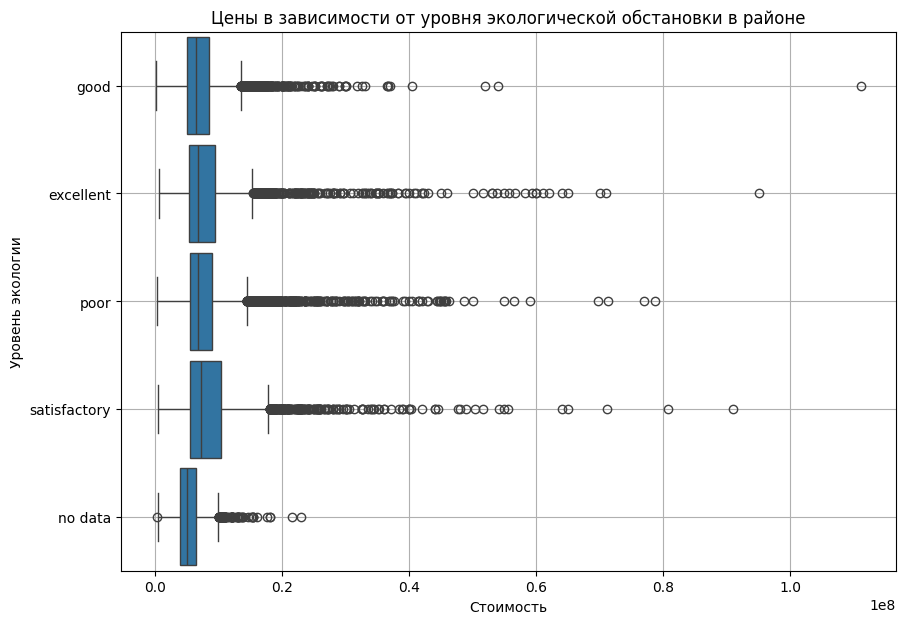

In [10]:
#Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. 
# Постройте коробчатую диаграмму цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). 
# Какой уровень ценится на рынке меньше всего?
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=sber_data,
    y='ecology',
    x='price_doc',
    orient='h',
    width=0.9
)
boxplot.set_title('Цены в зависимости от уровня экологической обстановки в районе');
boxplot.set_xlabel('Стоимость');
boxplot.set_ylabel('Уровень экологии');
boxplot.grid()


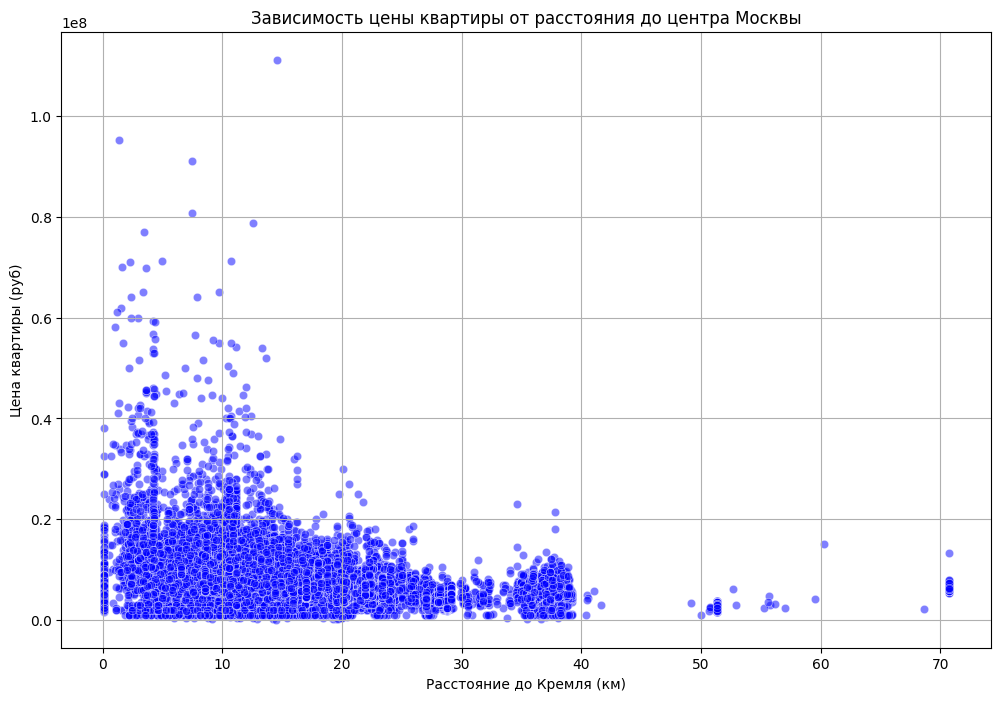

In [16]:
#Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до центра Москвы (kremlin_km).
# Выберите все верные утверждения.
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=sber_data,
    x='kremlin_km',  # Расстояние до Кремля по оси X
    y='price_doc',   # Цена квартиры по оси Y
    alpha=0.5,       # Прозрачность точек для лучшей визуализации
    color='blue'     # Цвет точек
)

plt.title('Зависимость цены квартиры от расстояния до центра Москвы')
plt.xlabel('Расстояние до Кремля (км)')
plt.ylabel('Цена квартиры (руб)')
plt.grid(True)
plt.show()

In [17]:
#Найти пропуски
# метод isnull(). Этот метод возвращает новый DataFrame, в ячейках которого стоят булевы значения True и False.
#True ставится на месте, где ранее находилось значение NaN.
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#Получим долю пропусков в каждом столбце.
# Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

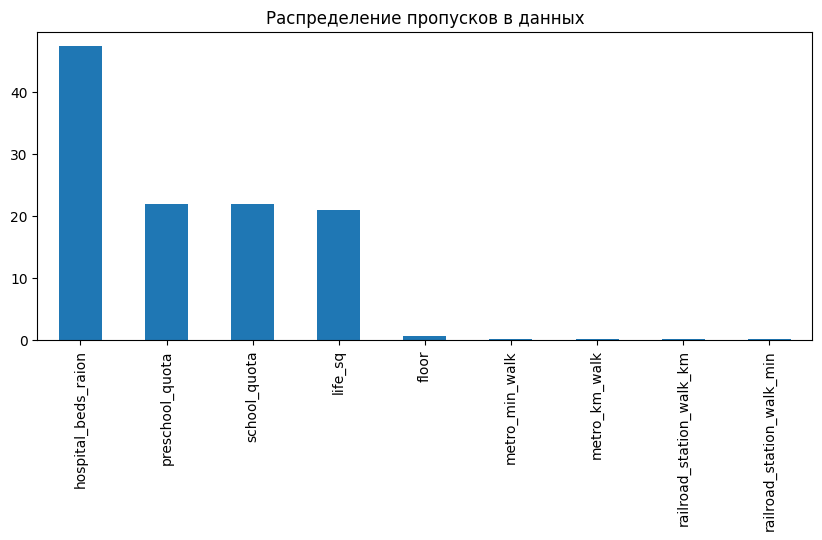

In [19]:
#чтобы визуально оценить соотношение числа пропусков к числу записей.
# Самый быстрый способ построить её — использовать метод plot():
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

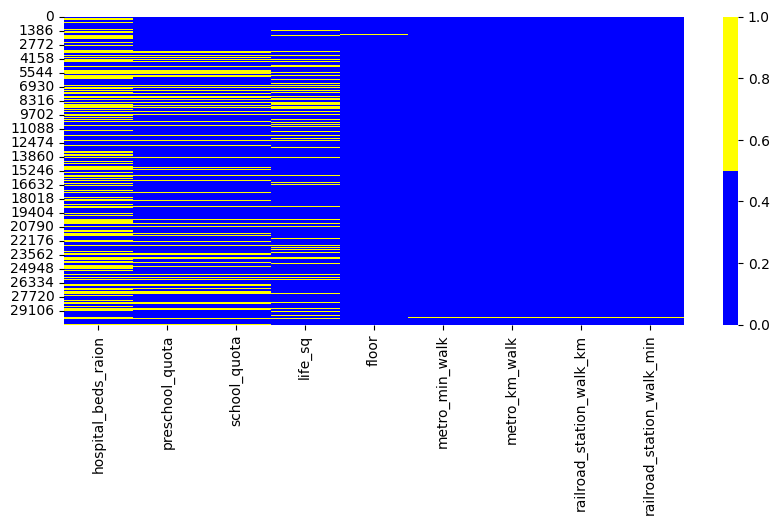

In [20]:
#Ещё один распространённый способ визуализации пропусков — тепловая карта. 
#Для создания такой тепловой карты можно воспользоваться результатом метода isnull(). 
# Ячейки таблицы, в которых есть пропуск, будем отмечать жёлтым цветом, а остальные — синим. 
# Для этого создадим собственную палитру цветов тепловой карты с помощью метода color_pallete() из библиотеки seaborn.
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [21]:
#Для удаления строк и столбцов будем использовать метод dropna(), который позволяет удалять пропуски с тонким подходом к настройке. 
#axis — ось, по которой производится удаление (по умолчанию 0 — строки).
#how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию;
# all — если во всех столбцах есть пропуски). 
#thresh — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. 
# Например, если мы установим thresh в значение 2, то мы удалим строки, где число пропусков больше чем  и более, где  — число признаков (если ).

#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [22]:
print(drop_data.shape)

(20888, 60)


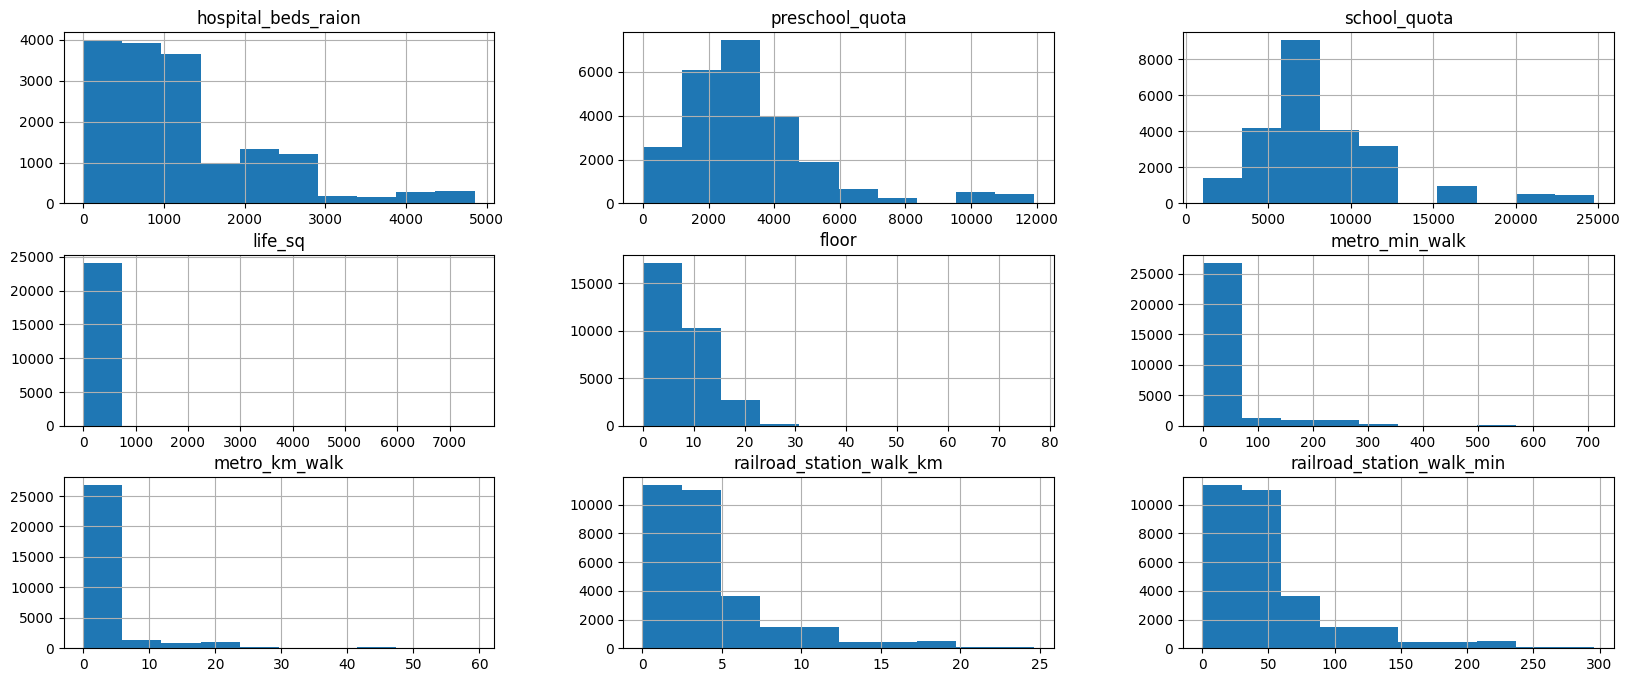

In [23]:
#Важным фактором при выборе метода заполнения пропусков  является распределение признаков с пропусками.
#  выведем их на экран.
# В pandas это можно сделать с помощью метода hist():
cols = cols_with_null.index
sber_data[cols].hist(figsize=(20, 8));

In [24]:
#Заполнение значений осуществляется с помощью метода fillna(). Главный параметр метода — value (значение, на которое происходит заполнение данных в столбце). 
# Если метод вызывается от имени всего DataFrame, то в качестве value можно использовать словарь,
# где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы. 
# Создадим такой словарь, соблюдая рекомендации, приведённые выше, 
# а также копию исходной таблицы. Произведём операцию заполнения с помощью метода fillna() и удостоверимся, что пропусков в данных больше нет:

#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()

id                   0.0
full_sq              0.0
life_sq              0.0
floor                0.0
sub_area             0.0
                    ... 
theater_km           0.0
museum_km            0.0
ecology              0.0
mosque_count_1000    0.0
price_doc            0.0
Length: 61, dtype: float64

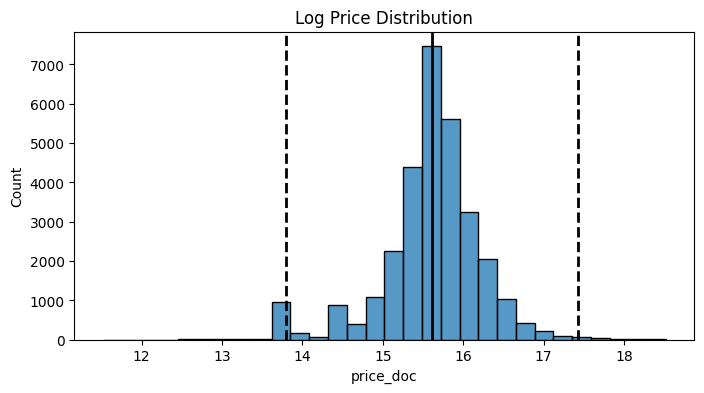

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price = np.log(sber_data['price_doc'])
histplot = sns.histplot(log_price, bins=30, ax=ax)
histplot.set_title('Log Price Distribution');
histplot.axvline(log_price.mean(), color='k', lw=2)
histplot.axvline(log_price.mean()+ 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price.mean()- 3 * log_price.std(), color='k', ls='--', lw=2);

In [ ]:
#Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). 
# Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. 
# Примените полученную функцию к признаку price_doc. 
# Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 92


In [5]:
diabetes_data = pd.read_csv('data/diabetes_data.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [18]:
print(diabetes_data.shape)

(537, 9)


In [9]:
#Найдите все повторяющиеся строки в данных и удалите их.
# Для поиска используйте все признаки в данных. Сколько записей осталось в данных?
dupl_columns = list(diabetes_data.columns)
mask = diabetes_data.duplicated(subset=dupl_columns)
diabetes_duplicates = diabetes_data[mask]
print(f'Число найденных дубликатов: {diabetes_duplicates.shape[0]}')
# Удаляем дубликаты, оставляя только первые вхождения
diabetes_clean = diabetes_data.drop_duplicates(subset=dupl_columns)

# Выводим количество оставшихся записей
print(f'Число записей после удаления дубликатов: {len(diabetes_clean)}')

Число найденных дубликатов: 10
Число записей после удаления дубликатов: 768


In [11]:
#найдите все неинформативные признаки в данных и избавьтесь от них. 
# В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны.
# В ответ запишите имена признаков, которые вы нашли (без кавычек).

#список неинформативных признаков
low_information_cols = [] 
#цикл по всем столбцам
for col in diabetes_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_data[col].nunique() / diabetes_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
information_diabetes_data = diabetes_data.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_diabetes_data.shape[1]}')

Gender: 100.0% одинаковых значений
Результирующее число признаков: 9


In [12]:
#пропуски в данных с помощью метода isnull() 
# В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём,
# Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. 
# Его вы можете взять из библиотеки numpy: np.nan.
#Какая доля пропусков содержится в столбце Insulin? 
import numpy as np

# Столбцы, где нужно заменить 0 на NaN
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Заменяем 0 на NaN в указанных столбцах
diabetes_data[columns_to_fix] = diabetes_data[columns_to_fix].replace(0, np.nan)

# Рассчитываем долю пропусков в Insulin
insulin_missing_ratio = diabetes_data['Insulin'].isna().mean()

# Округляем до сотых и выводим результат
print(f"Доля пропусков в Insulin: {round(insulin_missing_ratio, 2)}")

Доля пропусков в Insulin: 0.49


In [17]:
#Удалите из данных признаки, где число пропусков составляет более 30 %. 
# Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

#задаем минимальный порог: вычисляем 70% от числа строк
thresh = diabetes_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
diabetes_data = diabetes_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
diabetes_data = diabetes_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
diabetes_data.isnull().mean()
print(diabetes_data.shape)
print(f'Результирующее число признаков: {diabetes_data.shape[1]}')

(537, 9)
Результирующее число признаков: 9


In [ ]:
#Удалите из данных только те строки, в которых содержится более двух пропусков одновременно.
# Чему равно результирующее число записей в таблице?

In [ ]:
#В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? 

In [ ]:
#Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [ ]:
#Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?